In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Reading the data

In [2]:
df = (
    pd.read_csv("data/47th Season Governors Cup.csv", index_col="PLAYERS")
    .drop("Unnamed: 1", axis=1)
    .drop_duplicates()
    .sample(frac=1.0) # shuffle the players
)
df.head(10)

,GP,MIN,FGm,FGa,FG%,3Pm,3Pa,3P%,FTm,FTa,FT%,APG,STL,BLK,oREB,dREB,REB,PF,TOV,+/-,PTS
PLAYERS,,,,,,,,,,,,,,,,,,,,,
J. Gabayni,11,178.28,20,41,49%,0,0,0%,12,23,52%,5,3,5,16,29,45,37,11,-17,52
P. Paniamogan,2,6.28,2,6,33%,2,6,33%,0,0,0%,0,0,0,0,0,0,0,0,-11,6
S. Thompson,11,385.43,56,102,55%,15,42,36%,8,14,57%,67,11,7,22,45,67,30,19,85,135
M. Qualls,4,158.07,32,96,33%,9,35,26%,33,50,66%,14,4,3,12,34,46,7,10,-45,106
J. Faundo,1,2.12,0,0,0%,0,0,0%,1,1,100%,0,0,0,1,1,2,0,0,-6,1
J. Casio,11,225.67,38,94,40%,27,68,40%,6,8,75%,27,5,0,0,15,15,32,10,-110,109
J. Torralba,10,92.58,10,31,32%,5,14,36%,6,8,75%,4,4,0,4,8,12,18,6,-39,31
A. Dionisio,10,124.70,23,46,50%,10,23,43%,5,8,63%,2,6,2,17,10,27,17,8,19,61
K. Williams,11,290.47,40,73,55%,10,20,50%,5,15,33%,18,8,2,17,43,60,19,9,46,95


In [3]:
print(f"Number of unique players: {df.index.nunique()}")
print(f"Number of rows in the dataset: {df.shape[0]}")

Number of unique players: 162
Number of rows in the dataset: 163


# Average stats

In [4]:
features = ['PTS', '3Pa', 'FTa', 'APG', 'STL', 'BLK', 'REB', "TOV", "PF"] #, "MIN"
df_features = df[features].copy()

for col in features:
    df_features[f"{col}"] = (df_features[col] / df["GP"])

df_features = (
    df_features
    .fillna(0)
)
df_features.head()

,PTS,3Pa,FTa,APG,STL,BLK,REB,TOV,PF
PLAYERS,,,,,,,,,
J. Gabayni,4.727273,0.000000,2.090909,0.454545,0.272727,0.454545,4.090909,1.000000,3.363636
P. Paniamogan,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
S. Thompson,12.272727,3.818182,1.272727,6.090909,1.000000,0.636364,6.090909,1.727273,2.727273
M. Qualls,26.500000,8.750000,12.500000,3.500000,1.000000,0.750000,11.500000,2.500000,1.750000
J. Faundo,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000


# DBSCAN

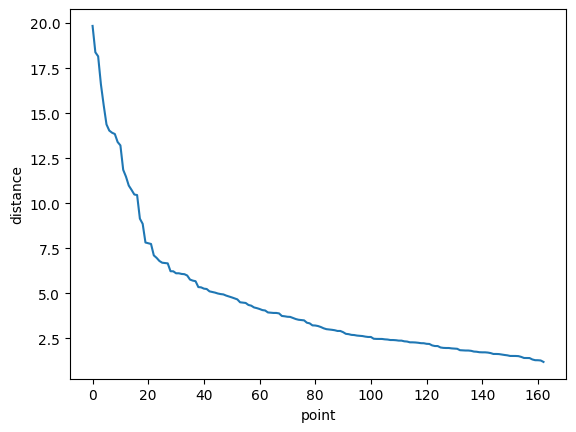

In [5]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

def get_kdist(k, data):
    # Recall that MinPts = twice the number of dimensions and k = MinPts - 1
    # We compute the distance of each point from its (k+1)th-nearest neighbor
    neigh = NearestNeighbors(n_neighbors=k+1) # we use k+1 to disregard the point itself
    nbrs = neigh.fit(data)
    distances, _ = nbrs.kneighbors(data)
    return list(np.sort(distances[:, k])[::-1])

# MinMax Scaling
min_pts = df_features.shape[1] * 2
k = min_pts - 1

plt.plot(get_kdist(k, df_features))
plt.xlabel("point")
plt.ylabel("distance");

# Giotto-TDA

### Defining the mapper pipeline

In [16]:
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)
from sklearn.decomposition import PCA
from umap import UMAP

# UMAP lens
umap_lens = UMAP(n_components=2, random_state=42)

# Initialise pipeline
mapper = make_mapper_pipeline(
    filter_func= umap_lens,#PCA(n_components=2),
    cover=CubicalCover(n_intervals=20, overlap_frac=0.25),
    clusterer=DBSCAN(eps=9, min_samples=min_pts),
    verbose=True,
    n_jobs=-1,
)

### Color the nodes

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s


C:\Users\tonba\miniconda3\envs\tda_env\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



[Pipeline] ....... (step 2 of 3) Processing filter_func, total=   1.5s
[Pipeline] ............. (step 3 of 3) Processing cover, total=   0.0s
[Pipeline] .... (step 1 of 3) Processing pullback_cover, total=   1.5s
[Pipeline] ........ (step 2 of 3) Processing clustering, total=   0.1s
[Pipeline] ............. (step 3 of 3) Processing nerve, total=   0.1s


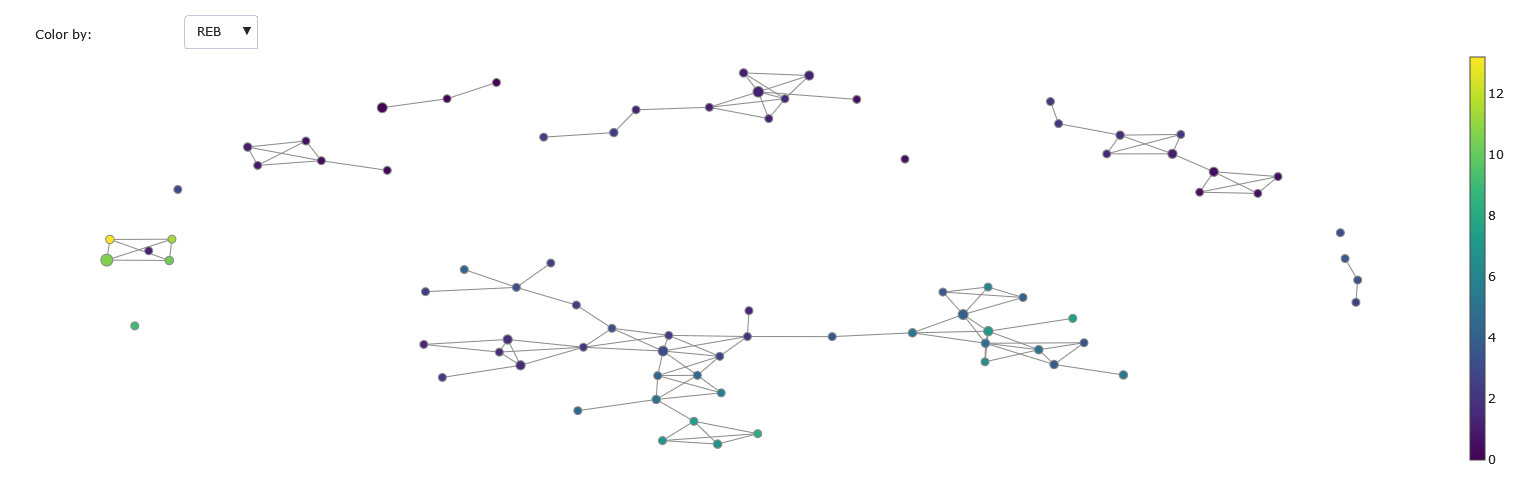

In [17]:
# Color by stats 
def stats_plotter():
    fig = plot_static_mapper_graph(mapper, 
                               df_features, 
                               layout_dim=2, 
                               color_data=df_features)
    fig.update_layout(width=700, height=500)
    fig.show(config={'scrollZoom': False})

stats_plotter()